In [25]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
    
from src.data import *
from src.utils.actors import *
from src.utils.graphs import Graph
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
download_data(force_download=False)

In [5]:
characters = load_characters()
movies = load_movies()

### Some stats about a single actor

In [7]:
actor_stats = ActorStats(characters, movies)

In [8]:
actor_id = "/m/0346l4"

In [9]:
actor_stats.actor_movies(actor_id).head(3)

,WikipediaId,FreebaseId,MovieName,ReleaseDate,Revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1854,9340076,/m/02854l1,Adrenalin: Fear the Rush,1996,37536.0,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01drsx"": ""Disaster"", ""/m/01jfsb"": ""Thrill..."
2710,7659023,/m/0kvdbl,Why I Wore Lipstick To My Mastectomy,2006,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama"", ""/m/017fp"": ""Biography..."


In [10]:
actor_stats.actor_name(actor_id)

'Natasha Henstridge'

In [11]:
actor_stats.actor_prefered_genres(actor_id, 4)

[('Thriller', 8), ('Action', 8), ('Action/Adventure', 7), ('Drama', 7)]

In [12]:
actor_stats.print_actor_stats(actor_id)

Name: Natasha Henstridge
  * Played in 20 movies.
  * Favourite genre: Thriller (8 movies).
  * Total movie revenues:      348,615,623$.
  * Average movie revenue:      43,576,953$.


### Create random actor clusters and display some stats

In [13]:
num_clusters = 100
np.random.seed(0)
num_actors = np.random.randint(low=5, high=50, size=num_clusters)
clusters = [Cluster(characters, movies, characters["FreebaseActorId"].drop_duplicates().sample(
    n=num_actors[i], random_state=i).to_list()
                   ) for i in range(num_clusters)]
cluster1 = clusters[0]

#### Stats about a single cluster

In [15]:
cluster1.cluster_mean_revenue()

66777055.33704851

In [16]:
cluster1.cluster_total_revenue()

10564668977.0

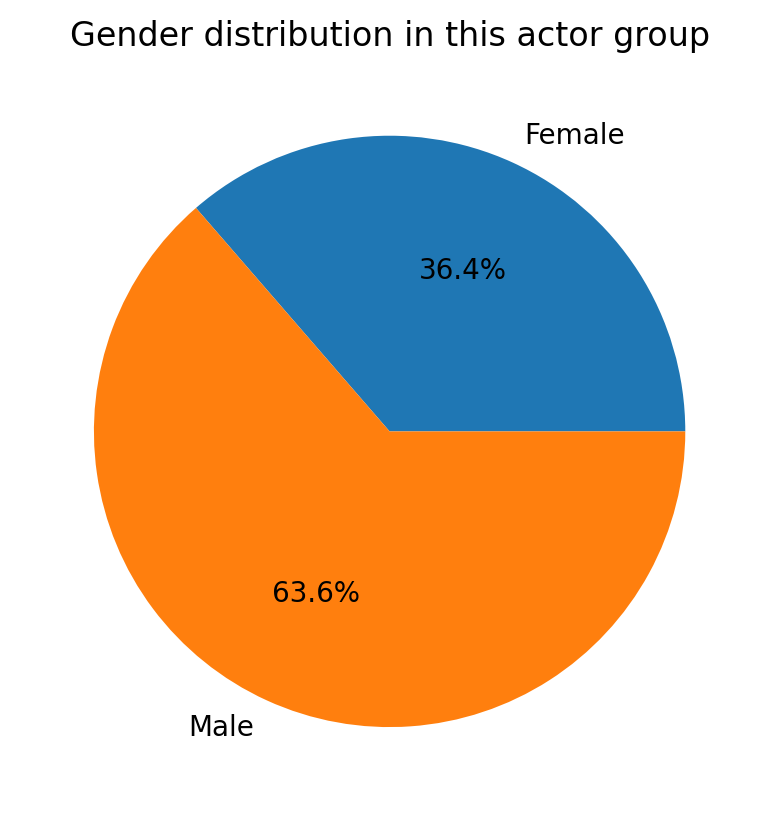

(0.36363636363636365, 0.6363636363636364)

In [19]:
cluster1.cluster_genders(plot=True)

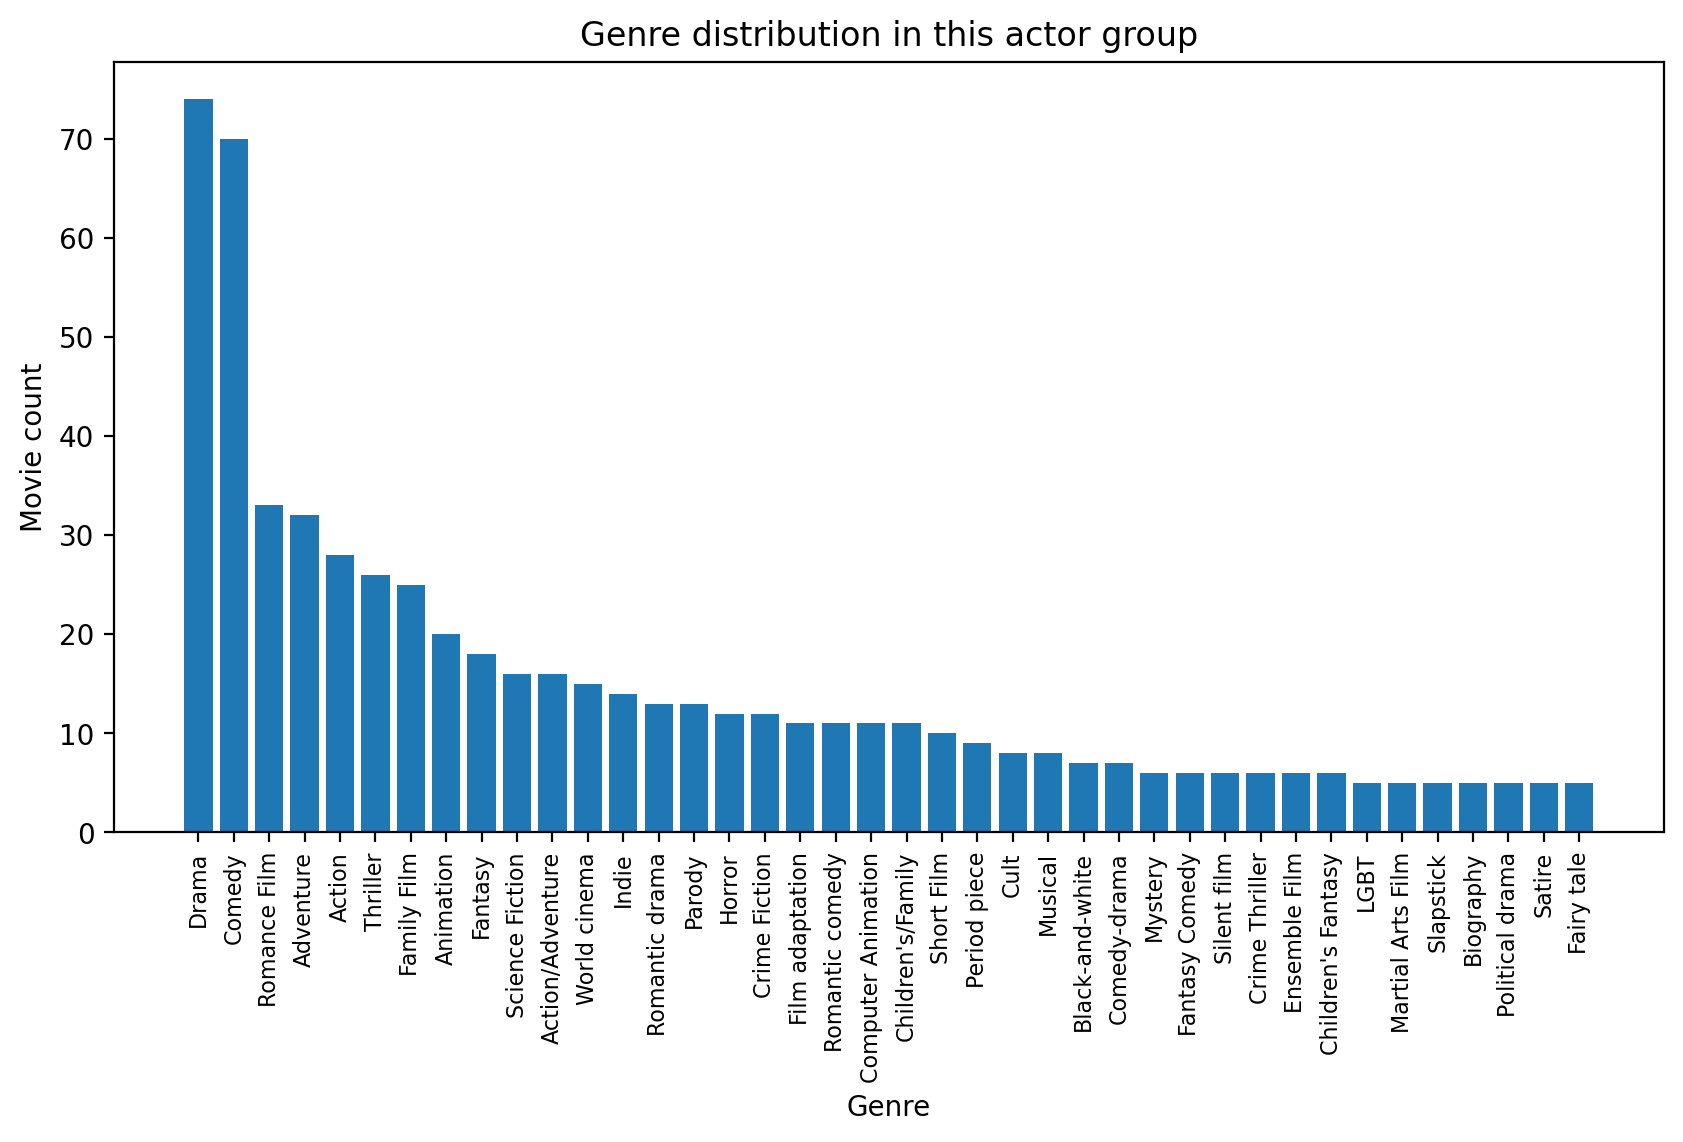

In [21]:
genres = cluster1.cluster_genres(plot=True)

#### Stats about a Graph

In [29]:
graph = Graph(clusters)

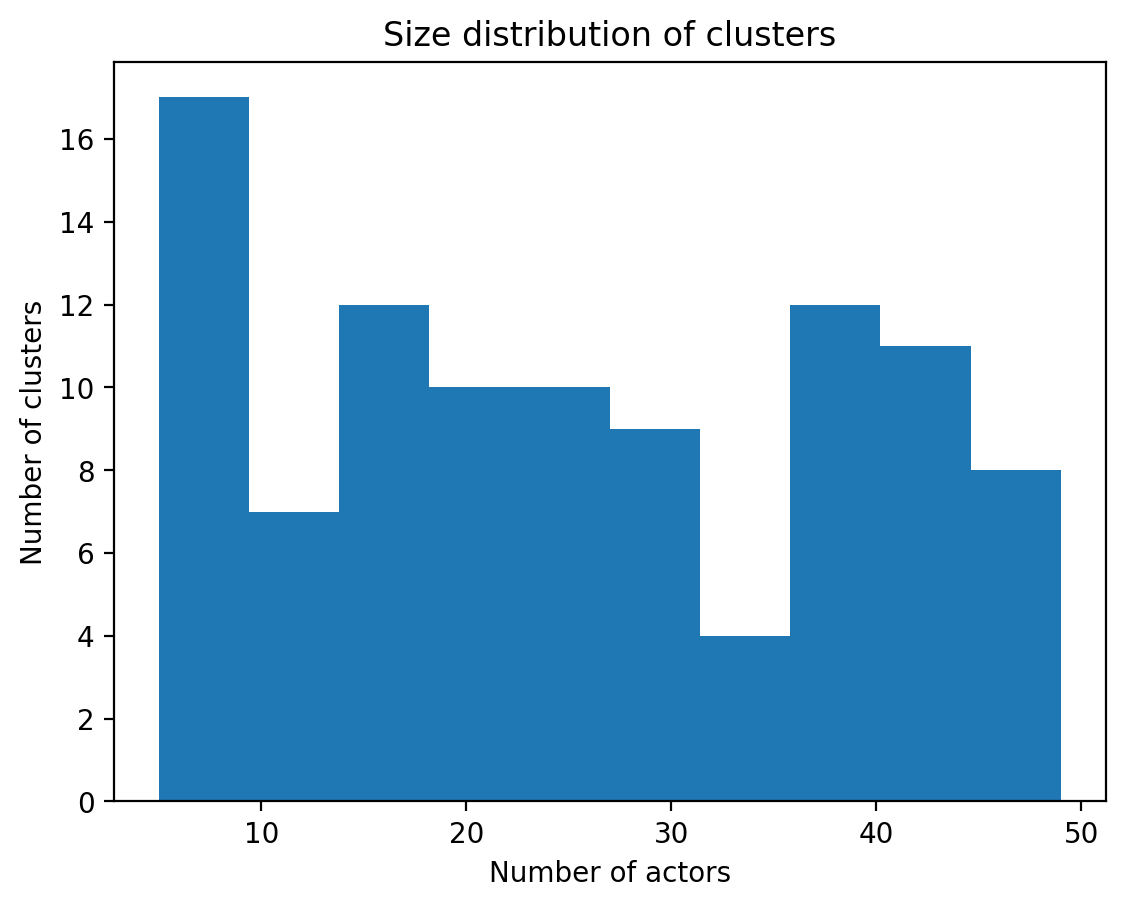

In [30]:
clusters_sizes = graph.size_distribution(plot=True)

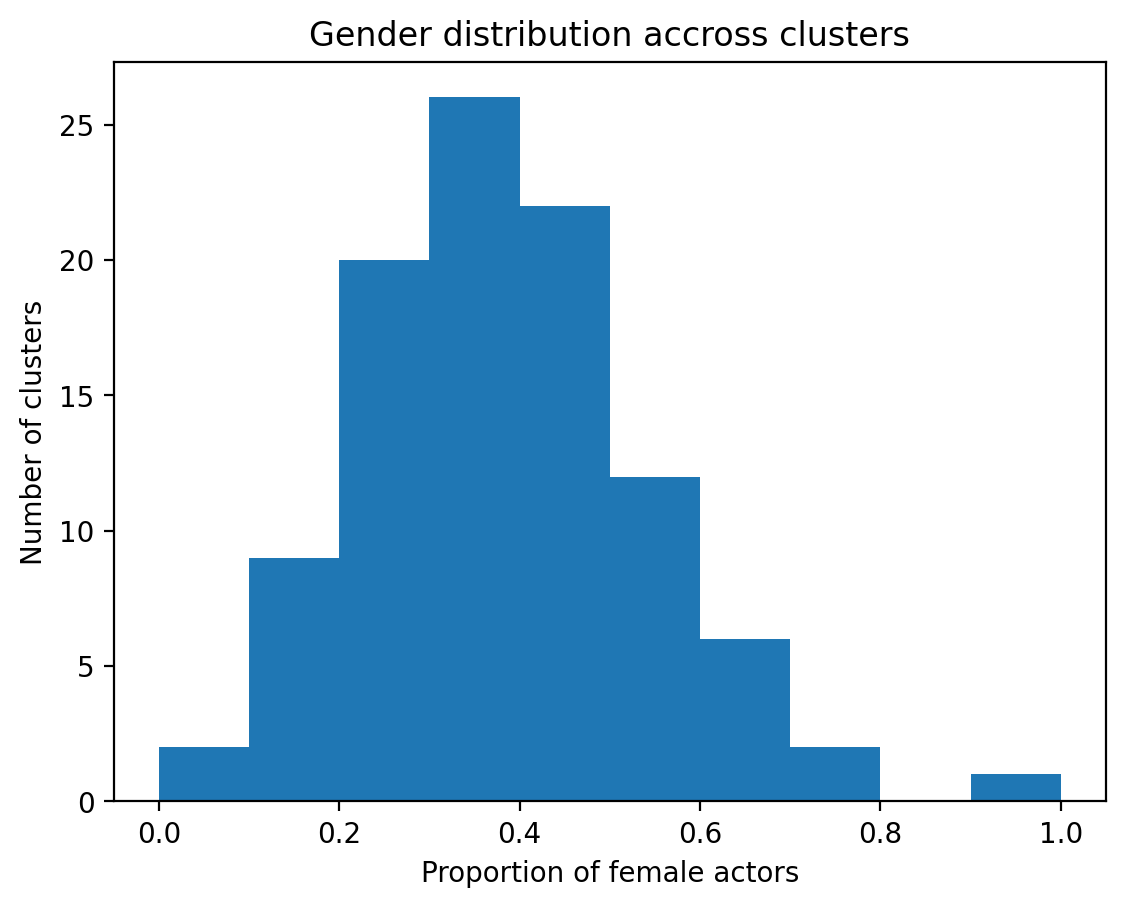

In [32]:
clusters_genders = graph.gender_distribution(plot=True)

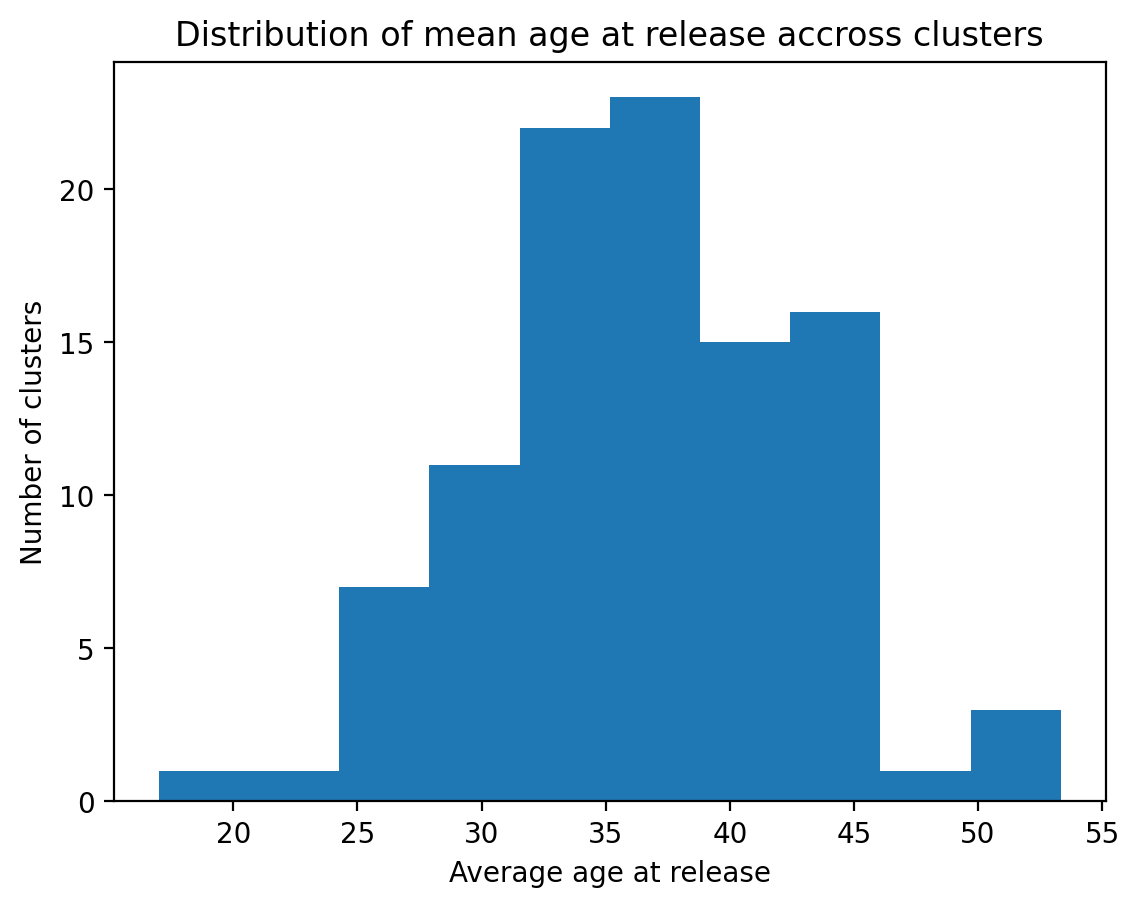

In [34]:
clusters_ages = graph.age_distribution(plot=True)

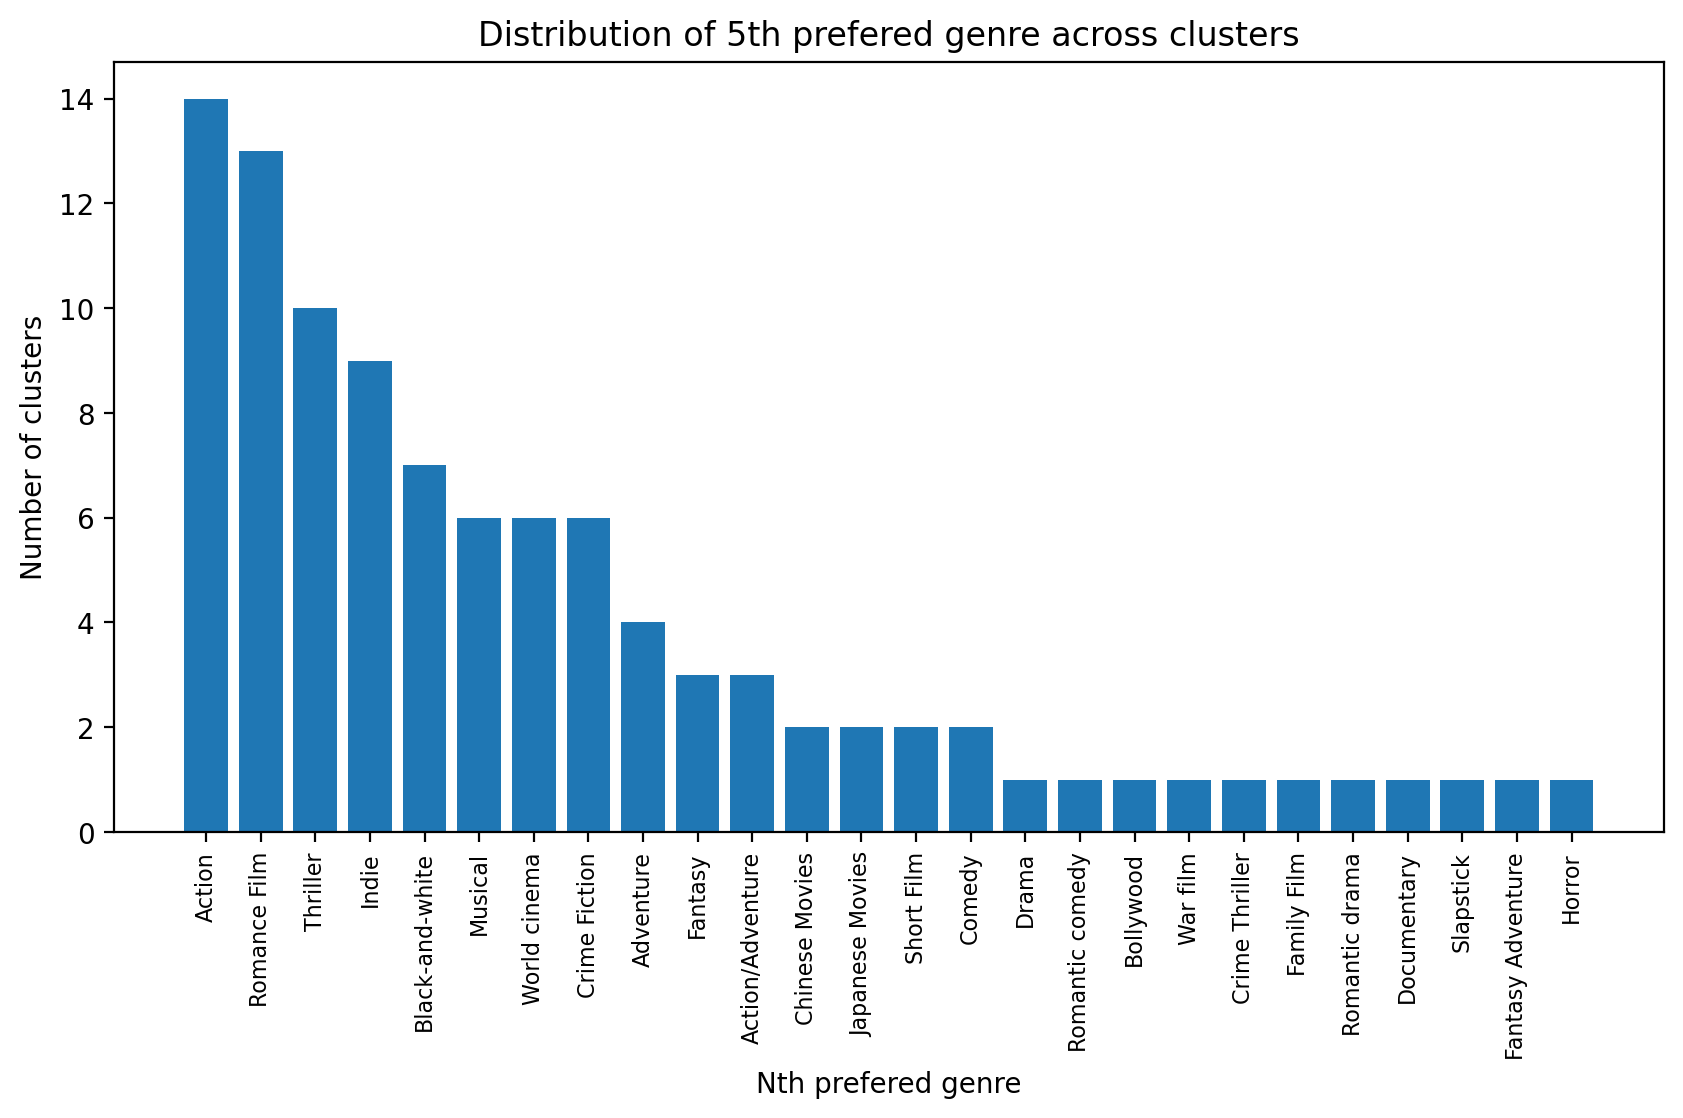

In [39]:
clusters_nth_genres = graph.nth_genre_distribution(5, plot=True)

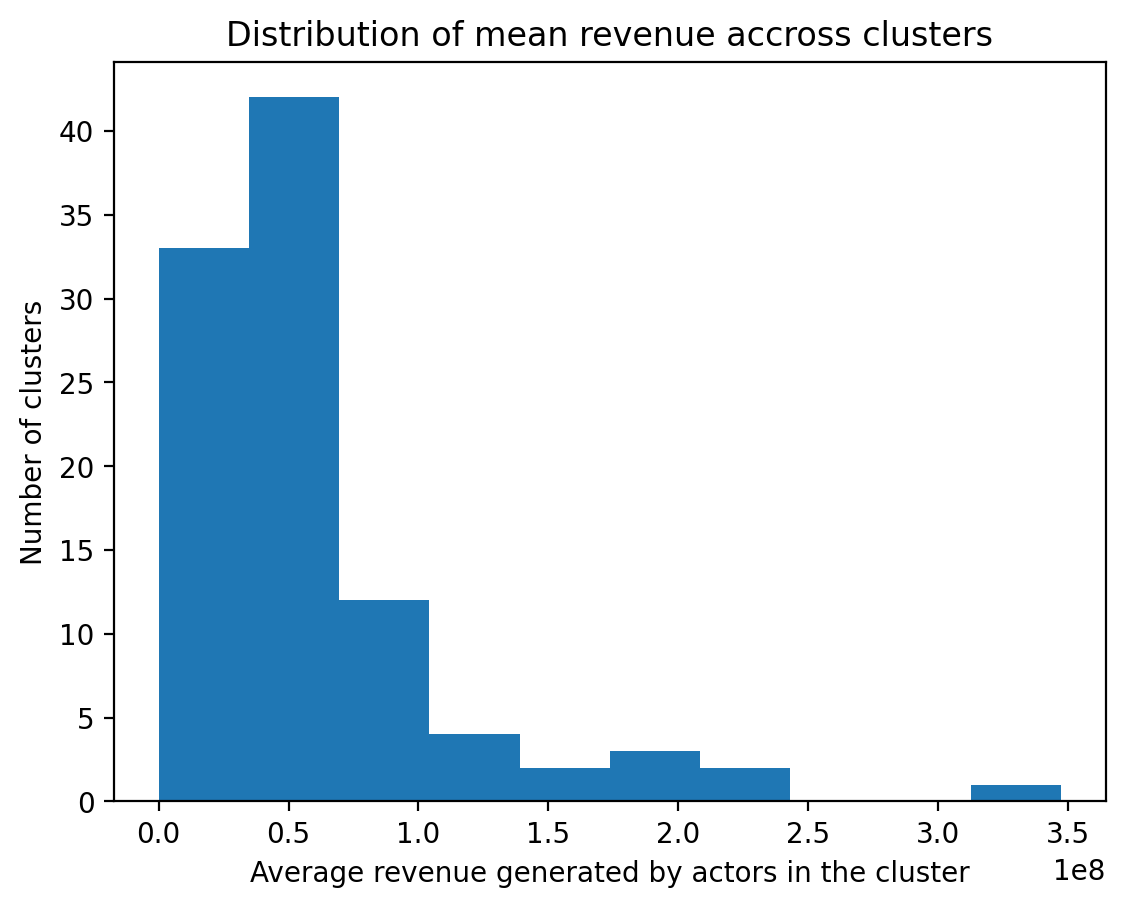

In [42]:
clusters_revenues = graph.revenue_distribution(plot=True)